# Data Import

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales (3).csv


In [2]:
import pandas as pd
import numpy as np
import io
df = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']))
data = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']), index_col='Rank')

# Data manipulation

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

In [5]:
def label_area (row):
   l = [row['NA_Sales'], row['EU_Sales'], row['JP_Sales'],row['Other_Sales']]
  #  print(l)
   m = max(l)
   if m == row['NA_Sales']:
     return 1
   if m == row['EU_Sales']:
     return 2
   if m == row['JP_Sales']:
     return 3
   return 0
  

In [6]:
df['area_label'] = df.apply(lambda row: label_area(row), axis=1)

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,area_label
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441,1.624292
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028,0.853952
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,1.000000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,1.000000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000,2.000000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,3.000000


In [8]:
unique_publisher = df.Publisher.unique()
unique_publisher

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [9]:
def label_publisher(row):
  for i in range(len(unique_publisher)):
    if row['Publisher'] == unique_publisher[i]:
      return i

In [10]:
df['publisher_label'] = df.apply(lambda row: label_publisher(row), axis=1)


In [11]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,area_label,publisher_label
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16540.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441,1.624292,61.632164
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028,0.853952,102.156301
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,1.000000,7.000000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,1.000000,19.000000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000,2.000000,58.000000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,3.000000,578.000000


In [12]:
unique_genre = df.Genre.unique()
unique_genre

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
def label_genre(row):
  for i in range(len(unique_genre)):
    if row['Genre'] == unique_genre[i]:
      return i

In [14]:
df['genre_label'] = df.apply(lambda row: label_genre(row), axis=1)

In [15]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,area_label,publisher_label,genre_label
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16540.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441,1.624292,61.632164,5.260333
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028,0.853952,102.156301,3.421823
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,1.000000,7.000000,2.000000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,1.000000,19.000000,6.000000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000,2.000000,58.000000,8.000000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,3.000000,578.000000,11.000000


In [16]:
include = ['Year', 'genre_label','publisher_label','area_label']

In [17]:
df.drop(columns=df.columns.difference(include), inplace=True) 

Data Manipulation of Model 1 (Answering Problem 2)

In [18]:
columns_to_drop = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

data.drop(columns_to_drop, axis=1, inplace=True)

data['Year'] = data['Year'].fillna(data['Year'].mean())

data = data.dropna(axis=0)

data['Platform'].unique()

data['Genre'].unique()

counts = data['Publisher'].value_counts()

data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

onehot_cols = ['Genre', 'Publisher']

def onehot(data, cols):
    for col in cols:
        dums = pd.get_dummies(data[col])
        data = pd.concat([data, dums], axis=1)
        data.drop(col, axis=1, inplace=True)
    return data

data = onehot(data, onehot_cols)

data.iloc[:,0] = pd.factorize(data.iloc[:,0])[0]

cols = []
count = 1
for column in data.columns:
    if column == 'Platform':
        cols.append(f'Platform_{count}')
        count+=1
        continue
    cols.append(column)
data.columns = cols

<ipython-input-18-f34e0849656a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)


# Neural Network to Predict Platform (Model 1 which Answers Problem 2)


In [19]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

import tensorflow as tf

y = data['Platform_1']
X = data.drop('Platform_1', axis=1)

scaler = StandardScaler()

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [20]:
inputs = tf.keras.Input(shape=(61,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['accuracy']
)


batch_size = 64
epochs = 18

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

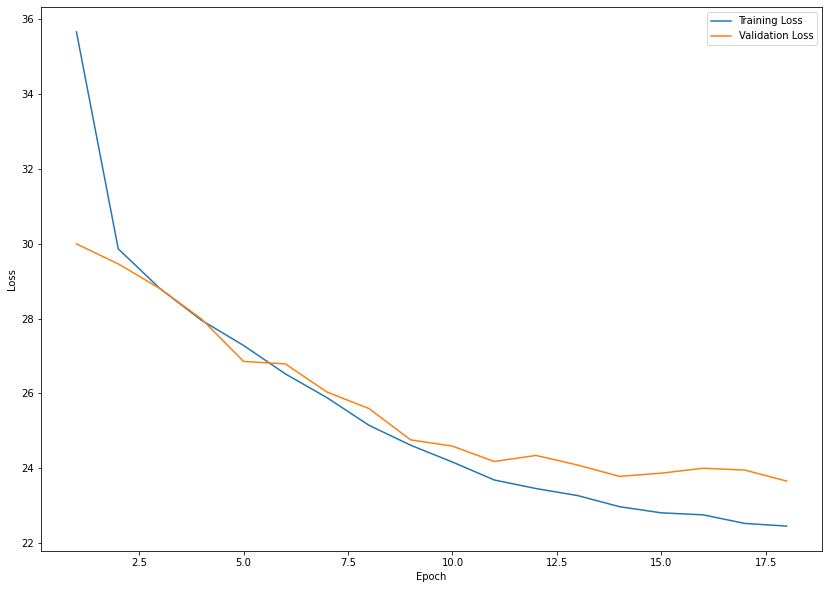

In [21]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [22]:
history.history

{'loss': [35.65256118774414,
  29.86071014404297,
  28.797626495361328,
  27.947593688964844,
  27.281341552734375,
  26.52170753479004,
  25.883821487426758,
  25.149734497070312,
  24.61644744873047,
  24.1676025390625,
  23.688383102416992,
  23.459617614746094,
  23.270999908447266,
  22.974666595458984,
  22.81100082397461,
  22.757421493530273,
  22.527935028076172,
  22.456933975219727],
 'accuracy': [0.006140765268355608,
  0.005384978838264942,
  0.005384978838264942,
  0.0055739255622029305,
  0.0055739255622029305,
  0.0055739255622029305,
  0.0055739255622029305,
  0.005762871820479631,
  0.00595181854441762,
  0.005762871820479631,
  0.006046291906386614,
  0.00595181854441762,
  0.006046291906386614,
  0.00642418535426259,
  0.0055739255622029305,
  0.006235238630324602,
  0.0058573451824486256,
  0.006235238630324602],
 'val_loss': [29.992698669433594,
  29.458457946777344,
  28.798568725585938,
  27.980955123901367,
  26.8538875579834,
  26.787853240966797,
  26.0338478

In [23]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results)

print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
52/52 [==============================] - 0s 2ms/step - loss: 24.2163 - accuracy: 0.0076
test loss, test acc: [24.216272354125977, 0.007557436358183622]
Generate predictions for 3 samples
1/1 [==============================] - 0s 66ms/step
predictions shape: (3, 1)


In [24]:
y_pred = model.predict(X_test, batch_size=64, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)
print(precision_score(y_test, y_pred_bool, average="macro"))

0.002871825876662636


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest with optimization


In [25]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import sklearn

df['publisher_label'] = df['publisher_label'].fillna(df['publisher_label'].median())
df['genre_label'] = df['genre_label'].fillna(df['genre_label'].median())
df['area_label'] = df['area_label'].fillna(df['area_label'].median())
df['Year'] = df['Year'].fillna(df['Year'].median())
dependent_variable = 'area_label'
x = df[df.columns.difference([dependent_variable])]
y = df[dependent_variable]
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=0.2)

In [26]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [27]:
rf_randomcv = RandomizedSearchCV(estimator=rf(),param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
# fit to randomized rf
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [28]:
# to see best parameters
print(rf_randomcv.best_params_)

# to make new classifier with the best estimator
best_random_grid=rf_randomcv.best_estimator_

{'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 780, 'criterion': 'entropy'}


In [29]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [30]:
clf = rf(n_estimators = 1000)
clf.fit(X_train, y_train)
base_accuracy = evaluate(clf, X_test, y_test)
print('****Results****')
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, pred))
print('\n')
print("Accuracy: {:.4%}".format(acc))

Model Performance
Average Error: 0.3864 degrees.
Accuracy = -inf%.
****Results****
=== Confusion Matrix ===
[[   0    9    5    2]
 [   0 1722  118  202]
 [   0  232  207   52]
 [   0  213   26  532]]


Accuracy: 74.1265%


In [31]:
random_accuracy = evaluate(best_random_grid, X_test, y_test)
print('****Results****')
pred = best_random_grid.predict(X_test)
acc = accuracy_score(y_test, pred)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, pred))
print('\n')
print("Accuracy: {:.4%}".format(acc))

Model Performance
Average Error: 0.3892 degrees.
Accuracy = -inf%.
****Results****
=== Confusion Matrix ===
[[   0   10    4    2]
 [   0 1770   87  185]
 [   0  245  180   66]
 [   0  241   18  512]]


Accuracy: 74.1566%


# Random Forest without optimization

In [32]:
# Train model 
clf = rf(n_estimators = 1000)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

Accuracy and confusion matrix

In [33]:
# results 
print('****Results****')
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, pred))
print('\n')
print("Accuracy: {:.4%}".format(acc))

****Results****
=== Confusion Matrix ===
[[   0   10    4    2]
 [   0 1745  103  194]
 [   0  235  202   54]
 [   0  223   29  519]]


Accuracy: 74.2771%


In [34]:
f1_score = sklearn.metrics.f1_score(y_test, pred, average='micro')
print(f1_score)

0.7427710843373494


# Neural Network RMSprop Optimizer

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

x.shape

(16598, 3)

In [36]:
print(X_train.shape)

(13278, 3)


In [37]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics = ['accuracy']
)


batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

Plot loss and accuracy

[0.32338541746139526, 0.30643945932388306, 0.30643945932388306, 0.30672189593315125, 0.30738091468811035, 0.30643945932388306, 0.30766335129737854, 0.30483901500701904, 0.31990209221839905, 0.3210318088531494, 0.3416494131088257, 0.35153454542160034, 0.3856147527694702, 0.4437958896160126, 0.4796648323535919, 0.504048228263855, 0.5443419218063354, 0.5755036473274231, 0.5904725790023804, 0.6042176485061646, 0.6077010035514832, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.61071360

<Figure size 1008x720 with 0 Axes>

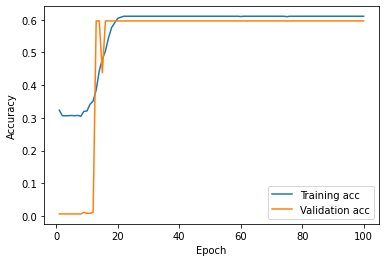

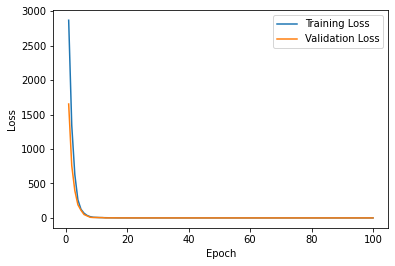

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
acc = history.history['accuracy']
print(acc)
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(epochs_range, acc,  label='Training acc')
plt.plot(epochs_range, val_acc, label='Validation acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [39]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
52/52 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6151
test loss, test acc: [0.6731179356575012, 0.6150602698326111]
Generate predictions for 3 samples
1/1 [==============================] - 0s 44ms/step
predictions shape: (3, 1)


# Neural Network with Adam Optimizer

In [43]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
opt = tf.keras.optimizers.Adam(learning_rate=0.05)

model.compile(
    optimizer=opt,
    loss='mse',
    metrics=['accuracy']
)


batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

Plot loss and accuracy

[0.5771982669830322, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657, 0.6107136011123657,

<Figure size 1008x720 with 0 Axes>

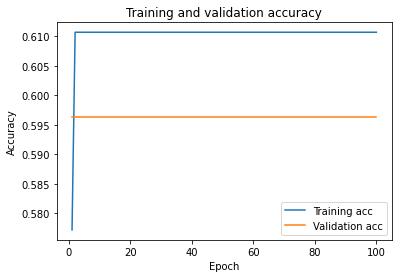

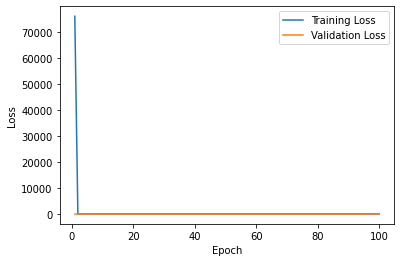

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print(acc)
plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs_range, acc,  label='Training acc')
plt.plot(epochs_range, val_acc, label='Validation acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [45]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
52/52 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.6151
test loss, test acc: [0.7134459018707275, 0.6150602698326111]
Generate predictions for 3 samples
1/1 [==============================] - 0s 43ms/step
predictions shape: (3, 1)
